## Analisando ações da Bovespa
#### https://medium.com/@cesar.vieira/analisando-a%C3%A7%C3%B5es-da-bovespa-parte-i-500107703688

## O modelo de Markowitz: como diversificar a sua carteira de investimentos
#### https://medium.com/@cesar.vieira/o-modelo-de-markowitz-como-diversificar-a-sua-carteira-de-investimentos-ec860bd0d637


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TickerA='LAME4.SA'
TickerB='WEGE3.SA'
TickerC='BRFS3.SA'
TickerD = '^BVSP'    #mercado'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

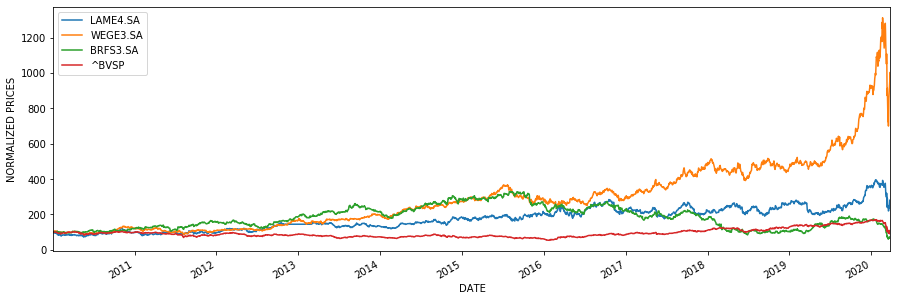

In [7]:
(prices/prices.iloc[0]*100).plot(figsize=(15,5))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.show()

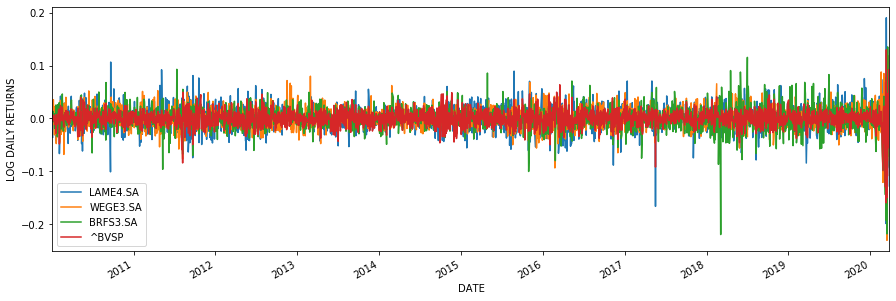

In [8]:
log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('LOG DAILY RETURNS')
plt.xlabel('DATE')
plt.show()

In [9]:
log_returns.mean()

LAME4.SA    0.000376
WEGE3.SA    0.000886
BRFS3.SA   -0.000141
^BVSP       0.000011
dtype: float64

In [10]:
log_returns.mean()*250

LAME4.SA    0.093929
WEGE3.SA    0.221556
BRFS3.SA   -0.035247
^BVSP       0.002860
dtype: float64

In [11]:
log_returns.std()

LAME4.SA    0.023174
WEGE3.SA    0.019263
BRFS3.SA    0.021534
^BVSP       0.015945
dtype: float64

In [12]:
log_returns.corr()

,LAME4.SA,WEGE3.SA,BRFS3.SA,^BVSP
LAME4.SA,1.000000,0.386554,0.394485,0.653654
WEGE3.SA,0.386554,1.000000,0.330920,0.474098
BRFS3.SA,0.394485,0.330920,1.000000,0.512848
^BVSP,0.653654,0.474098,0.512848,1.000000


### Markowitz

In [13]:
np.random.seed(1)
nsample=10000
ntick = 4

pfolio_returns = []
pfolio_volatilities = []
all_weights = np.zeros((nsample, ntick))
exp_return = np.zeros(nsample)
exp_std = np.zeros(nsample)
exp_var = np.zeros(nsample)
riskreturn = np.zeros(nsample)

for i in range(nsample):
    weights = np.random.random(ntick)
    weights = weights/np.sum(weights)
    
    all_weights[i,:] = weights #salva os pesos
    
    exp_return[i]= np.sum(weights * log_returns.mean())*250 #Retorno
    exp_var[i] = np.dot(weights.T,np.dot(log_returns.cov()*250, weights))
    exp_std[i] = np.sqrt(exp_var[i]) #Risco
    
    riskreturn[i]=exp_return[i]/exp_std[i] #Retorno/Risco
    
    pfolio_returns.append(exp_return[i])
    pfolio_volatilities.append(exp_std[i])
    
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)

In [14]:
all_weights[pfolio_volatilities.argmin()]

array([0.01477723, 0.30497186, 0.17542083, 0.50483007])

In [15]:
all_weights[pfolio_returns.argmax()]

array([0.07973165, 0.90233577, 0.00175745, 0.01617513])

In [16]:
all_weights[riskreturn.argmax()]

array([0.07973165, 0.90233577, 0.00175745, 0.01617513])

In [17]:
print("Os valores ótimos % de cada ativo são:\n", 
      "\nLAME4:", str(round(all_weights[riskreturn.argmax()][0]*100, 3))+"%",
      "\nWEGE3:", str(round(all_weights[riskreturn.argmax()][1]*100, 3))+"%", 
      "\nBRFS3:", str(round(all_weights[riskreturn.argmax()][2]*100, 3))+"%", 
      "\nBOVA11:", str(round(all_weights[riskreturn.argmax()][3]*100, 3))+"%")

Os valores ótimos % de cada ativo são:
 
LAME4: 7.973% 
WEGE3: 90.234% 
BRFS3: 0.176% 
BOVA11: 1.618%


In [21]:
index=riskreturn.argmax()
print("O retorno máximo esperado é de: ",str(round(pfolio_returns[index]*100,3))+"%") #maior retorno

O retorno máximo esperado é de:  20.739%
